In [34]:
#from io import BytesIO
import os.path as osp
import os 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

CBcolors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

In [35]:
#root = osp.split(osp.abspath('WS2.ipynb'))[0][:-22]
# inPath = osp.join(root,"TestComponents", "TestSets", "WS2")
# outPath = osp.join(root,"TestGraphs", "Outputs")  
inPath = osp.join("TestComponents", "TestSets", "WS2")
outPath = osp.join("TestGraphs", "Outputs")  

In [36]:
Configs = pd.read_pickle(osp.join(inPath, "FieldConfigs.pkl"))

In [37]:
observedCrop = pd.read_csv(osp.join(inPath, "CropData.csv"), index_col=0)
observedCrop.sort_index(axis=0,inplace=True)
observedCrop['Date'] = pd.to_datetime(observedCrop['Date'],dayfirst=True)

In [38]:
observedSoil = pd.read_csv(osp.join(inPath, "SoilData.csv"),index_col=0)
observedSoil.sort_index(axis=0,inplace=True)
observedSoil['Date'] = pd.to_datetime(observedSoil['Date'],dayfirst=True)
observedSoil['SoilMineralN'] = observedSoil.loc[:,['SoilN0_15', 'SoilN15_30']].sum(axis=1)

In [39]:
testFiles = []
tests = []
for file in os.listdir(osp.join(inPath,"Outputs")):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

In [40]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(osp.join(inPath, "Outputs", t),index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

In [41]:
TestsFrame = pd.DataFrame(index = [int(x[0]) for x in tests],data=tests,columns = ['crop'])
TestsFrame.index.name = 'Site'

In [42]:
TestsFrame

,crop
Site,
1,1-1Rye-A
1,1-2Rye-AB
1,1-3Oni-A
1,1-4Gra-A
2,2-1Bar-A
2,2-2Oni-A
2,2-3Cauli-A
2,2-4Pot-B
3,3-1Must-A


In [78]:
ObsPredCropN = observedCrop.loc[:,['Date','CropN']]
ObsPredCropN.set_index('Date',append=True,inplace=True)
ObsPredCropN.columns = ['obs']

In [81]:
ObsPredCropN

obs
Site Date             
1    2020-10-10   34.0
     2020-12-30    9.0
     2020-12-30   10.0
     2020-12-30    6.0
     2020-12-30    4.0
...                ...
9    2023-02-13  189.0
     2023-02-13  143.0
     2023-03-16  242.0
     2023-03-16  306.0
     2023-03-16  327.0

[452 rows x 1 columns]

In [80]:
 AllData

1-1Rye-A                                            \
                    SoilMineralN   UptakeN  ResidueN   SoilOMN FertiliserN   
Date                                                                         
2019-11-21 12:00:00    49.994456  0.420026  0.000000  0.414482         0.0   
2019-11-22 12:00:00    49.704927  0.408184 -0.305727  0.424382         0.0   
2019-11-23 12:00:00    49.870258  0.000000 -0.265229  0.430559         0.0   
2019-11-24 12:00:00    50.071839  0.000000 -0.220416  0.421998         0.0   
2019-11-25 12:00:00    50.319770  0.000000 -0.192610  0.440540         0.0   
...                          ...       ...       ...       ...         ...   
2025-02-14 12:00:00          NaN       NaN       NaN       NaN         NaN   
2025-02-15 12:00:00          NaN       NaN       NaN       NaN         NaN   
2025-02-16 12:00:00          NaN       NaN       NaN       NaN         NaN   
2025-02-17 12:00:00          NaN       NaN       NaN       NaN         NaN   
2025-02-18 12:00:00          NaN       NaN       NaN       NaN         NaN   

                                                                      ...  \
                          CropN    ProductN LostN      RSWC Drainage  ...   
Date                                                                  ...   
2019-11-21 12:00:00  192.173648  159.286976   0.0  0.900000      0.0  ...   
2019-11-22 12:00:00  192.581832  159.625307   0.0  0.903590      0.0  ...   
2019-11-23 12:00:00    0.000000    0.000000   0.0  0.900075      0.0  ...   
2019-11-24 12:00:00    0.000000    0.000000   0.0  0.893959      0.0  ...   
2019-11-25 12:00:00    0.000000    0.000000   0.0  0.888052      0.0  ...   
...                         ...         ...   ...       ...      ...  ...   
2025-02-14 12:00:00         NaN         NaN   NaN       NaN      NaN  ...   
2025-02-15 12:00:00         NaN         NaN   NaN       NaN      NaN  ...   
2025-02-16 12:00:00         NaN         NaN   NaN       NaN      NaN  ...   
2025-02-17 12:00:00         NaN         NaN   NaN       NaN      NaN  ...   
2025-02-18 12:00:00         NaN         NaN   NaN       NaN      NaN  ...   

                    9-3Broccoli                                                \
                       ResidueN SoilOMN FertiliserN CropN ProductN LostN RSWC   
Date                                                                            
2019-11-21 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
2019-11-22 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
2019-11-23 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
2019-11-24 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
2019-11-25 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
...                         ...     ...         ...   ...      ...   ...  ...   
2025-02-14 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
2025-02-15 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
2025-02-16 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
2025-02-17 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   
2025-02-18 12:00:00         NaN     NaN         NaN   NaN      NaN   NaN  NaN   

                                                     
                    Drainage Irrigation Green cover  
Date                                                 
2019-11-21 12:00:00      NaN        NaN         NaN  
2019-11-22 12:00:00      NaN        NaN         NaN  
2019-11-23 12:00:00      NaN        NaN         NaN  
2019-11-24 12:00:00      NaN        NaN         NaN  
2019-11-25 12:00:00      NaN        NaN         NaN  
...                      ...        ...         ...  
2025-02-14 12:00:00      NaN        NaN         NaN  
2025-02-15 12:00:00      NaN        NaN         NaN  
2025-02-16 12:00:00      NaN        NaN         NaN  
2025-02-17 12:00:00      NaN        NaN         NaN  
2025-02-18 12:0

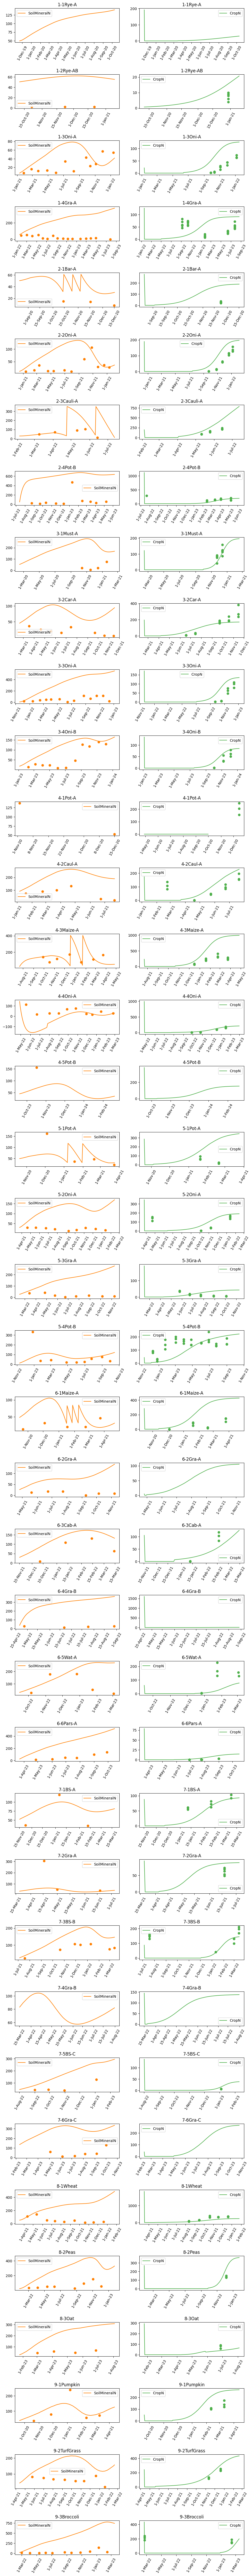

In [50]:
colors = ['orange','green']
Graph = plt.figure(figsize=(10,100))
pos = 1
row_num=len(tests)

for s in range(1,10):
    testsAtSite = TestsFrame.loc[s,'crop'].values
    for t in testsAtSite: #['1Gra-A']:#tests:
        site = t[0]
        #for c in t:     
        #    if c in ['0','1','2','3','4','5','6','7','8','9']: site += c
        site = int(site)

        dates = AllData.loc[Configs.loc["PriorHarvestDate",t]:Configs.loc["CurrentHarvestDate",t],(t,'CropN')].index
        c = 0    
        for v in ['SoilMineralN','CropN']:
            ax = Graph.add_subplot(row_num,2,pos)
            Data = AllData.loc[dates,(t,v)]
            plt.plot(Data,color=CBcolors[colors[c]],label=v)

            if v == 'CropN':
                sData = observedCrop.loc[site,:]
            if v == 'SoilMineralN':
                sData = observedSoil.loc[site,:]
            dFilter = [dates.min() <= sData['Date'].iloc[x] <= dates.max() for x in range(len(sData['Date']))]
            plt.plot(sData.loc[dFilter,'Date'],sData.loc[dFilter,v],'o',color=CBcolors[colors[c]])

            plt.title(t)
            plt.xticks(rotation=60)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b-%y'))
            #plt.ylim(0,800)
            plt.legend()
            Graph.tight_layout(pad=1.5)
            pos+=1
            c+=1

    plt.savefig(osp.join(outPath, "TimeCourse.png"))

In [44]:
# colors = ['orange','green']
# Graph = plt.figure(figsize=(10,10))
# pos = 1
# row_num=len(test_names)

# for t in test_names:
#     dates = AllData.loc[Configs.loc["PriorHarvestDate",t]:Configs.loc["CurrentHarvestDate",t],(t,'CropN')].index
#     c = 0    
#     for v in ['ResidueN','SoilOMN']:
#         color = 'b'
#         ax = Graph.add_subplot(row_num,2,pos)
#         Data = AllData.loc[dates,(t,v)].cumsum()
#         plt.plot(Data,color=CBcolors[colors[c]],label=v)
#         plt.title(t)
#         plt.xticks(rotation=60)
#         ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
#         plt.legend()
#         Graph.tight_layout(pad=1.5)
#         pos+=1
#         c+=1

In [45]:
# colors = ['orange','green']
# Graph = plt.figure(figsize=(10,10))
# pos = 1
# row_num=len(test_names)

# for t in test_names:
#     dates = AllData.loc[Configs.loc["PriorHarvestDate",t]:Configs.loc["CurrentHarvestDate",t],(t,'CropN')].index
#     c = 0    
#     for v in ['Drainage', 'Irrigation']:
#         color = 'b'
#         ax = Graph.add_subplot(row_num,2,pos)
#         Data = AllData.loc[dates,(t,v)].cumsum()
#         plt.plot(Data,color=CBcolors[colors[c]],label=v)
#         plt.title(t)
#         plt.xticks(rotation=60)
#         ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
#         plt.legend()
#         Graph.tight_layout(pad=1.5)
#         pos+=1
#         c+=1

In [46]:
# colors = ['orange','green']
# Graph = plt.figure(figsize=(10,10))
# pos = 1
# row_num=len(test_names)

# for t in test_names:
#     dates = AllData.loc[Configs.loc["PriorHarvestDate",t]:Configs.loc["CurrentHarvestDate",t],(t,'CropN')].index
#     c = 0    
#     for v in ['Green cover', 'RSWC']:
#         color = 'b'
#         ax = Graph.add_subplot(row_num,2,pos)
#         Data = AllData.loc[dates,(t,v)]
#         plt.plot(Data,color=CBcolors[colors[c]],label=v)
#         plt.title(t)
#         plt.xticks(rotation=60)
#         ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
#         plt.legend()
#         Graph.tight_layout(pad=1.5)
#         pos+=1
#         c+=1